<a href="https://colab.research.google.com/github/ziyaashraf0907/python-mini-project/blob/main/Introduction_to_Machine_Learning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

In [ ]:
#Introduction to ML
#used libraries-random,bumpy,pandas

In [ ]:
#Terms in ML
#1.collection:It is the data used for training, validating and testing the ML model
#2.Feature: It is independent variable or input variable used to predict the target variable. Denoted with X
#3.Target(Y): It is a dependent variable or output variable that we want to predict. Example: predicting number of bedrooms
#4.Training data: subset of dataset used to train the model
#5.testing data: subset of dataset used to validate the trained model.
#6.model: Mathematical representation of relationship between feature and a target.
#7.supervised learning:Training the data based on labeled data or output or data with known outcomes./the model learns from known or labelled data.
#8.Regressio: method to predict continous values from a model-supervised learning.
#9.Overfitting:when a model learns from training data to well,includes Nosie-performs poorly new data.
#10.Underfitting: model is too simpler and don't capture patterns in data.


##Categroies in ML
#1. supervised learning :
# Model learns from labelled data -i/o pairs
#Example: linear regression, decision tree,svm
# best use case so far : House price prediction based on previous/historical data.

#2.unsupervised learning:
#Model finds new patterns in unlabelled data without predicting data/labels.
#example: clustering (k means ),PCA(principle component analysis)
#use case : customer segmentation in marketing.

#3.Reinforcement learning:
#Model learns by interacting with environment and receiving the rewards or penalties.
# Example: deep learning, Alphago..,
#Best use case: self car driving vehicles.

In [ ]:
#example: predicting the house price-random dataset-generated
#Steps:
#1.generate a randoms dataset
#2.train a ML model- linear regression
#3.evaluatethe model
#4.make prediction

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
#step1:generate a dataset
np.random.seed(42)#used to set same sequence of values for the random package
numsamples=100

size = np.random.randint(800,5000,numsamples)
bedrooms = np.random.randint(1,6,numsamples)
washrooms = np.random.randint(1,8,numsamples)
localityscore = np.random.randint(1,10,numsamples)

#Generate house price with randomness
housePrice = (size*3000)+(bedrooms*50000)+(washrooms* 30000)+(localityscore * 70000)+ np.random.randint(-50000,50000,numsamples)

#Create a dataframe
df = pd.DataFrame(
     {
          'size' : size,
          'Bedrooms':bedrooms,
          'Washrooms':washrooms,
          'LocalityScore':localityscore,
          'Price':housePrice
     }
)

In [8]:
df

,size,Bedrooms,Washrooms,LocalityScore,Price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [9]:
#Step2: Train a ML model-linear regression
#package (installation) requirements:
#pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X=df[['size','Bedrooms','Washrooms','LocalityScore']]
Y=df['Price']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
#step3: Evaluate the model
#Package installation
#sklearn.metrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error: {MAE}')
print(f'Mean Squared Error: {MSE}')
print(f'Root Mean Absolute Error: {RMSE}')

Mean Absolute Error: 25385.345481365337
Mean Squared Error: 796791448.4323988
Root Mean Absolute Error: 28227.494547557686


In [23]:
#step4:Make prediction
newhouse=np.array([[4000,4,6,10]])
predictedprice=model.predict(newhouse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
print(f'The predicted price of the new house is {predictedprice[0]}')

The predicted price of the new house is 13069094.887436867


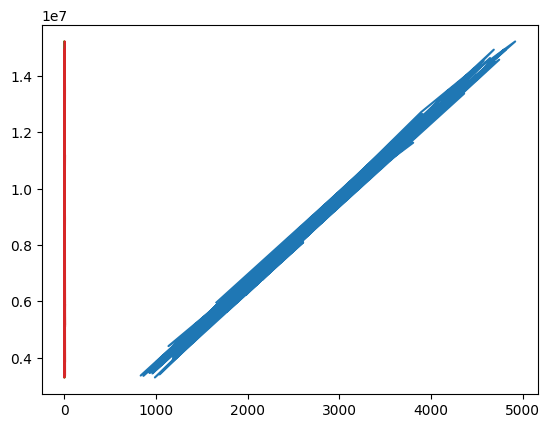

In [27]:
plt.plot(X,Y)

<ipython-input-33-83aecdffb582>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


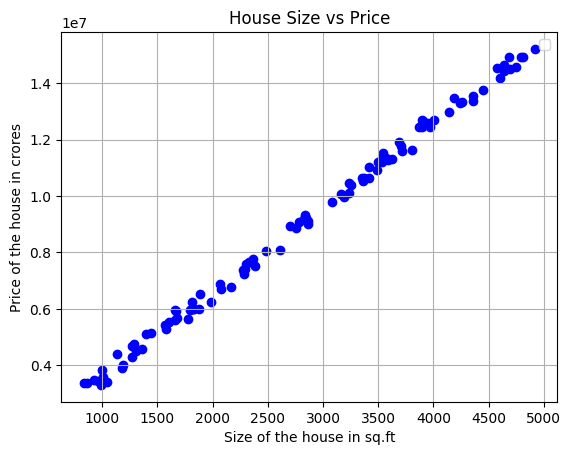

In [33]:
plt.scatter(df['size'],df['Price'],color='blue')
plt.xlabel('Size of the house in sq.ft')
plt.ylabel('Price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('House Size vs Price')
plt.show()

In [39]:
Xsorted = np.sort(X,axis=0)
yPred = model.predict(Xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-40-cab1c8b26989>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


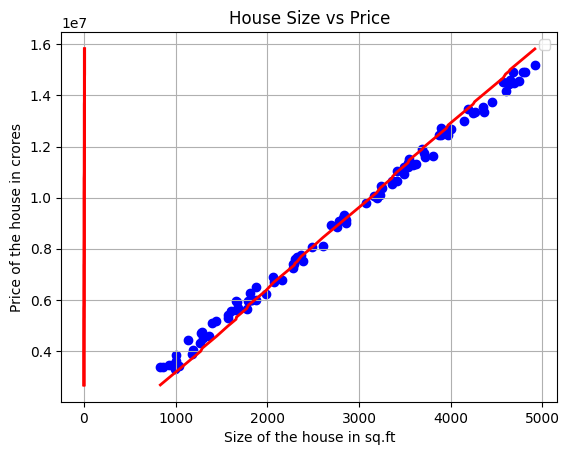

In [40]:
plt.scatter(df['size'],df['Price'],color='blue')
plt.plot(Xsorted,yPred,color='red',linewidth= 2)
plt.xlabel('Size of the house in sq.ft')
plt.ylabel('Price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('House Size vs Price')
plt.show()